In [1]:
import scipy.interpolate as interp
year = [1970, 1980, 2000]
pop = [3.713423, 4.445386, 6.086149]
pop_model = interp.lagrange(year,pop)
print(pop_model)

           2
0.0002947 x - 1.091 x + 1009


In [2]:
import numpy as np
def err(meas,act) :
    return np.absolute(meas-act)/act*100

In [3]:
print(pop_model(1990),err(pop_model(1990),5.286811))
print(pop_model(1950),err(pop_model(1950),2.557629))
print(pop_model(2010),err(pop_model(2010),6.872671))
print(pop_model(2050))
print(pop_model(2100))

5.236294666657614 0.9555161578953093
2.4263339999915843 5.133465409111941
6.994948999990811 1.7791918162648925
11.219605666656776
17.826703999989604


In [4]:
import urllib.request
url = 'https://raw.githubusercontent.com/cwru-phys-250/p250-spring-2019/master/data/hw2.dat'
with urllib.request.urlopen(url) as fp :
    (time, position) = np.loadtxt(fp, unpack=True)

print ("Values stored in the `time` array:\n\t", time)
print ("Values stored in the `position` array:\n\t", position)

Values stored in the `time` array:
	 [1. 2. 3. 4. 7. 8. 9.]
Values stored in the `position` array:
	 [-3.4083885 -5.6100975 -5.8256509 -3.9787359  5.3127362  5.9562532
  4.4910645]


In [5]:
print(time[2:6])
print(position[2:6])
position_interp = interp.lagrange(time[2:6],position[2:6])
print(position_interp(5))
print(position_interp(6))

[3. 4. 7. 8.]
[-5.8256509 -3.9787359  5.3127362  5.9562532]
-0.7659231699999989
2.701622469999993


1036.6594813484328


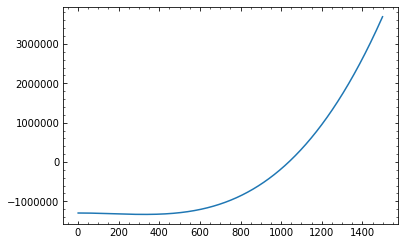

In [6]:
position_interp2 = interp.InterpolatedUnivariateSpline(time, position)
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
fig = plt.figure()
ax = fig.add_subplot(111)
time_array = np.arange(1,1500,1)
def period_root(t) :
    return position_interp2(t) - (1296000 - 3.4083885)
ax.plot(time_array, period_root(time_array))
period = opt.brentq(period_root, 800, 1200) - 1
print(period)